In [1]:
# Start with loading all necessary libraries
import numpy as np
import pandas as pd
from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import nltk
import matplotlib
# matplotlib.use('Agg')
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

# %matplotlib inline

In [2]:
nltk.download('stopwords')
nltk.download('punkt')
stop_words = set(stopwords.words('english'))
# translator = str.maketrans('', '', string.punctuation)

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\kcoll\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\kcoll\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [3]:
df = pd.read_csv("review_data.csv", index_col=0)
df.head()

,stars,text
Column1,,
9,1,The food better be good because the iced coffe...
11,1,"""Who's in the kitchen and why can't they do th..."
13,1,Not Impressed at all. Ordered a omelette and b...
14,1,never coming back here again. all of the glass...
18,1,"Well, lots to say. Managers were busy makin co..."


In [4]:
# Function to remove stop words from a text
def remove_stopwords(text):
    # Tokenize the text
    tokens = word_tokenize(text)
    
    # Remove stop words
    filtered_tokens = [token for token in tokens if token.lower() not in stop_words]
    
    # Join the filtered tokens back into a string
    filtered_text = ' '.join(filtered_tokens)
    
    return filtered_text

# Apply the remove_stopwords function to the 'text' column in your dataframe
df['text'] = df['text'].apply(remove_stopwords)


In [5]:
df.head()

,stars,text
Column1,,
9,1,"food better good iced coffee horrible , servic..."
11,1,`` 's kitchen ca n't job ? '' Reviewed 2 days ...
13,1,Impressed . Ordered omelette bacon . bacon for...
14,1,never coming back . glasses crusty cloudy look...
18,1,"Well , lots say . Managers busy makin coffee d..."


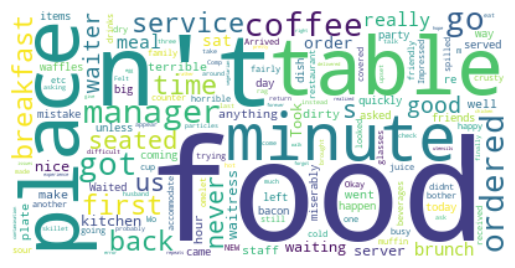

In [6]:
# Start with one review:
text = ' '.join(df['text'])

# Create and generate a word cloud image:
wordcloud = WordCloud(background_color='white').generate(text)

# Display the generated image
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

In [ ]:
# # Save the image to a file
# plt.savefig('wordcloud.png', bbox_inches='tight')